# 12 Steps to Naiver-Stokes

The final two steps in this interactive module teaching beginning CFD with Python will both solve the Naiver-Stokes equations in two dimensions, but with different boundary conditions.

The momentum equation in vector form for a velocity field $\vec{v}$ is :
$$
\dfrac{\partial{\vec{v}}}{\partial{t}}+\big(\vec{v}\cdot\nabla\big)\vec{v} = -\dfrac{1}{\rho}\nabla{p}+\nu\nabla^2\vec{v}
$$

This represents three scalar equations, one for each velocity component$(u, v, w)$. But we will solve it in two dimensions, so where will be two scalar equations.

Remember the continuity equation? This is where in Poisson equation for pressure comes in!

## Step11: Cavity Flow with Navier-Stokes

Here is the system of differential equations: two equations for the velocity components $(u, v)$ and one equation for pressure:

$$
\dfrac{\partial{u}}{\partial{t}}+u\dfrac{\partial{u}}{\partial{x}}+v\dfrac{\partial{u}}{\partial{y}}=-\dfrac{1}{\rho}\dfrac{\partial{p}}{\partial{x}}+\nu\big(\dfrac{\partial^2{u}}{\partial{x^2}}+\dfrac{\partial^2{u}}{\partial{y}^2}\big) \\
\dfrac{\partial{v}}{\partial{t}}+u\dfrac{\partial{v}}{\partial{x}}+
v\dfrac{\partial{v}}{\partial{y}}=-\dfrac{1}{\rho}\dfrac{\partial{p}}{\partial{y}}+\nu\big(\dfrac{\partial^2{v}}{\partial{x^2}}+\dfrac{\partial^2{v}}{\partial{y^2}}\big) \\
\dfrac{\partial^2{p}}{\partial{x^2}}+\dfrac{\partial^2{p}}{\partial{y^2}}=-\rho\big(\dfrac{\partial{u}}{\partial{x}}\dfrac{\partial{u}}{\partial{x}} + 2\dfrac{\partial{u}}{\partial{y}}\dfrac{\partial{v}}{\partial{x}} + \dfrac{\partial{v}}{\partial{y}}\dfrac{\partial{v}}{\partial{y}}\big)+\rho\dfrac{\partial}{\partial{t}}\big(\dfrac{\partial{u}}{\partial{x}}+\dfrac{\partial{u}}{\partial{y}}\big)
$$

Frome the previous steps, we already know how to discretize all these terms. Only the last equation is a little unfamiliar. But with a little patience, it will not be hard!

## Discretized equations

First, let's discretize the $u$-momentum equation, as follows:

$$
\dfrac{u_{i,j}^{n+1} - u_{i,j}^{n}}{\Delta{t}}+
u_{i,j}^{n}\dfrac{u_{i,j}^{n}-u_{i-1,j}^{n}}{\Delta{x}}+
v_{i,j}^{n}\dfrac{u_{i,j}^{n}-u_{i,j-1}^{n}}{\Delta{y}}=-\dfrac{1}{\rho}
\dfrac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta{x}}+\nu\big(
\dfrac{u_{i+1,j}^{n}-2u_{i,j}^{n}+u_{i-1,j}^{n}}{\Delta{x^2}}+
\dfrac{u_{i,j+1}^{n}-2u_{i,j}^{n}+u_{i,j-1}^{n}}{\Delta{y^2}}\big)
$$

Similarly for the $v$-momentum equation:

$$
\dfrac{v_{i,j}^{n+1} - v_{i,j}^{n}}{\Delta{t}}+
u_{i,j}^{n}\dfrac{v_{i,j}^{n}-v_{i-1,j}^{n}}{\Delta{x}}+
v_{i,j}^{n}\dfrac{v_{i,j}^{n}-v_{i,j-1}^{n}}{\Delta{y}}=-\dfrac{1}{\rho}
\dfrac{p_{i+1,j}^{n}-p_{i-1,j}^{n}}{2\Delta{x}}+\nu\big(
\dfrac{v_{i+1,j}^{n}-2v_{i,j}^{n}+v_{i-1,j}^{n}}{\Delta{x^2}}+
\dfrac{v_{i,j+1}^{n}-2v_{i,j}^{n}+v_{i,j-1}^{n}}{\Delta{y^2}}\big)
$$

Finally, the disretized pressure-Poisson equation can be writtend thus:

$$
\dfrac{p_{i+1,j}^{n}-2p_{i,j}^{n}+p_{i-1,j}^{n}}{\Delta{x^2}}+
\dfrac{p_{i,j+1}^{n}-2p_{i,j}^{n}+p_{i,j-1}^{n}}{\Delta{y^2}}= \\
\rho
[\dfrac{1}{\Delta{t}}\big(\dfrac{u_{i+1,j}^{n}-u_{i-1,j}^{n}}{2\Delta{x}}+\dfrac{u_{i,j+1}^{n}-u_{i,j-1}^{n}}{2\Delta{y}}\big)]-\rho
\big(\dfrac{u_{i+1,j}^{n}-u_{i-1,j}^{n}}{2\Delta{x}}\dfrac{u_{i+1,j}^{n}-u_{i-1,j}^{n}}{2\Delta{x}}+
2\dfrac{u_{i,j+1}^{n}-u_{i,j-1}^{n}}{2\Delta{y}}\dfrac{v_{i+1,j}^{n}-v_{i-1,j}^{n}}{2\Delta{x}}+
\dfrac{v_{i,j+1}^{n}-v_{i,j-1}^{n}}{2\Delta{y}}
\dfrac{v_{i,j+1}^{n}-v_{i,j-1}^{n}}{2\Delta{y}}\big)
$$

**这个方程是我写的最头疼的**

$\LaTeX$敲死我了。关键教程11步错误太多了。要注意。

The initial condition is $u,v,p=0$ everwhere, and the boundary conditions are:

$u = 1 \ at \ y = 2(the "lid")$

$u = 0, v = 0 \ at \ x = 0, 2  y = 0$

$\frac{\partial{p}}{\partial{y}}=0 \ at y = 0$

$\frac{\partial{p}}{\partial{x}}=0 \ at x = 0, 2$

$p = 0 \ at \ y = 2$





## Implementing Cavity Flow

In [155]:
import numpy as np
from matplotlib import pyplot, cm
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [156]:
nx = 41
ny = 41
dx = 2/(nx-1)
dy = 2/(ny-1)
nt = 500
nit = 50
rho = 1
nu = 0.1
dt = 0.001
x = np.linspace(0, 2, nx)
y = np.linspace(0, 2, ny)
X, Y = np.meshgrid(x,y)
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))
b = np.zeros((ny, nx))

In [157]:
'''
def build_up_b(b, rho, dt, dx, dy, u, v):
    b[1:-1, 1:-1] = (rho * (u[1:-1, 2:] - u[1:-1, :-2]) / (dt * 2 * dx)
                  + rho * (u[2:, 1:-1] - u[-2:, 1:-1]) / (dt * 2 * dx)
                  - rho *((u[1:-1, 2:] - u[1:-1, :-2]) / (2*dx)) ** 2 
                  - rho *((v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dy)) ** 2 
                  - rho *((u[2:, 1:-1] - u[:-2, 1:-1]) * (v[1:-1, 2:] - v[1:-1, :-2])) / (2*dx*dy))
    return b
'''

'\ndef build_up_b(b, rho, dt, dx, dy, u, v):\n    b[1:-1, 1:-1] = (rho * (u[1:-1, 2:] - u[1:-1, :-2]) / (dt * 2 * dx)\n                  + rho * (u[2:, 1:-1] - u[-2:, 1:-1]) / (dt * 2 * dx)\n                  - rho *((u[1:-1, 2:] - u[1:-1, :-2]) / (2*dx)) ** 2 \n                  - rho *((v[2:, 1:-1] - v[:-2, 1:-1]) / (2*dy)) ** 2 \n                  - rho *((u[2:, 1:-1] - u[:-2, 1:-1]) * (v[1:-1, 2:] - v[1:-1, :-2])) / (2*dx*dy))\n    return b\n'

In [158]:
def build_up_b(b, rho, dt, u, v, dx, dy):
    
    b[1:-1, 1:-1] = (rho * (1 / dt * 
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / 
                     (2 * dx) + (v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy)) -
                    ((u[1:-1, 2:] - u[1:-1, 0:-2]) / (2 * dx))**2 -
                      2 * ((u[2:, 1:-1] - u[0:-2, 1:-1]) / (2 * dy) *
                           (v[1:-1, 2:] - v[1:-1, 0:-2]) / (2 * dx))-
                          ((v[2:, 1:-1] - v[0:-2, 1:-1]) / (2 * dy))**2))
    return b



In [159]:
b = build_up_b(b, rho, dt, u, v, dx, dy)
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [160]:
def pressure_poisson(p, dx, dy, b):
    #define a pseudo-time variable-nit;
    pn = np.empty_like(p)
    pn = p.copy()
    for i in range(nit):
        pn = p.copy()
        p[1:-1, 1:-1] = ((dy**2)*(pn[1:-1, 2:] + pn[1:-1, :-2]) + (dx ** 2)*(pn[2:,1:-1] + pn[:-2, 1:-1]))/(2*(dx**2 + dy**2))\
                  - (dx**2 * dy**2) * b[1:-1,1:-1] /(2*(dx**2 + dy**2))
    
        p[:, -1] = p[:, -2]
        p[:, 0]  = p[:, 1]
        p[-1, :] = 0
        p[0, :] = p[1, :]
    return p

In [161]:
p = pressure_poisson(p, dx, dy, b)
len(p)

41

In [162]:
def cavity_flow(nt, u, v, p, rho, nu, dt, dx, dy):
    un = np.empty_like(u)
    vn = np.empty_like(v)
    b = np.zeros((ny, nx))
    for i in range(nt):
        un = u.copy()
        vn = v.copy()
        
        b = build_up_b(b, rho, dt, u, v, dx, dy)
        p = pressure_poisson(p, dx, dy, b)
        
        u[1:-1, 1:-1] = un[1:-1, 1:-1] - (dt/dx)*un[1:-1,1:-1]*(un[1:-1,1:-1] - un[1:-1,:-2]) - (dt/dy)*vn[1:-1,1:-1]*(un[1:-1,1:-1] - un[:-2, 1:-1])\
                        -(dt/(rho*2*dx))*(p[1:-1,2:] - p[1:-1,:-2]) + (nu*dt/(dx**2))*(un[1:-1, 2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2]) \
                                                                    + (nu*dt/(dy**2))*(un[2:, 1:-1] - 2*un[1:-1,1:-1] + un[:-2, 1:-1])

        
        v[1:-1, 1:-1] = vn[1:-1, 1:-1] - (dt/dx)*un[1:-1,1:-1]*(vn[1:-1,1:-1] - vn[1:-1,:-2]) - (dt/dy)*vn[1:-1,1:-1]*(vn[1:-1,1:-1] - vn[:-2, 1:-1])\
                        -(dt/(rho*2*dy))*(p[2:,1:-1] - p[:-2,1:-1]) + (nu*dt/(dx**2))*(vn[1:-1,2:] - 2*vn[1:-1,1:-1] + vn[1:-1,:-2]) \
                                                                    + (nu*dt/(dy**2))*(vn[2:,1:-1] - 2*vn[1:-1,1:-1] + vn[:-2,1:-1])
        u[-1,:] = 1
        u[0,:] = 0
        u[:,0] = 0
        u[:,-1] =0
        v[-1,:] = 0
        v[0, :] = 0
        v[:,0] = 0
        v[:,-1] = 0
    return u, v, p

In [163]:
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))
nt = 100
u, v, p = cavity_flow(nt, u, v, p, rho, nu, dt, dx, dy)

In [164]:
u

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00, -1.19105612e-04, -3.37772519e-04, ...,
        -3.37781111e-04, -1.19082867e-04,  0.00000000e+00],
       [ 0.00000000e+00, -2.21738629e-04, -5.87066929e-04, ...,
        -5.86872886e-04, -2.21616847e-04,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  7.69369548e-02,  1.32138839e-01, ...,
         1.40758835e-01,  8.36091528e-02,  0.00000000e+00],
       [ 0.00000000e+00,  2.84245095e-01,  3.78027934e-01, ...,
         3.85779353e-01,  2.94538924e-01,  0.00000000e+00],
       [ 0.00000000e+00,  1.00000000e+00,  1.00000000e+00, ...,
         1.00000000e+00,  1.00000000e+00,  0.00000000e+00]])

In [165]:
v

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  1.18755725e-04,  2.19965118e-04, ...,
        -2.19900464e-04, -1.18654225e-04,  0.00000000e+00],
       [ 0.00000000e+00,  3.37100108e-04,  5.83062381e-04, ...,
        -5.82814519e-04, -3.36786892e-04,  0.00000000e+00],
       ...,
       [ 0.00000000e+00,  1.40921090e-01,  1.12419202e-01, ...,
        -1.11643087e-01, -1.44415541e-01,  0.00000000e+00],
       [ 0.00000000e+00, -6.77351475e-02, -7.00775123e-02, ...,
         7.09428617e-02,  7.09247512e-02,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

In [166]:
p

array([[-0.05633692, -0.05633692, -0.05667008, ...,  0.0716934 ,
         0.07136158,  0.07136158],
       [-0.05633692, -0.05633692, -0.05667008, ...,  0.0716934 ,
         0.07136158,  0.07136158],
       [-0.05600672, -0.05600672, -0.05634709, ...,  0.07136991,
         0.07103093,  0.07103093],
       ...,
       [-1.36731777, -1.36731777, -0.96997649, ...,  1.02232328,
         1.45290451,  1.45290451],
       [-3.07732429, -3.07732429, -1.94447235, ...,  1.97960704,
         3.15867727,  3.15867727],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

Text(0,0.5,'$y$')

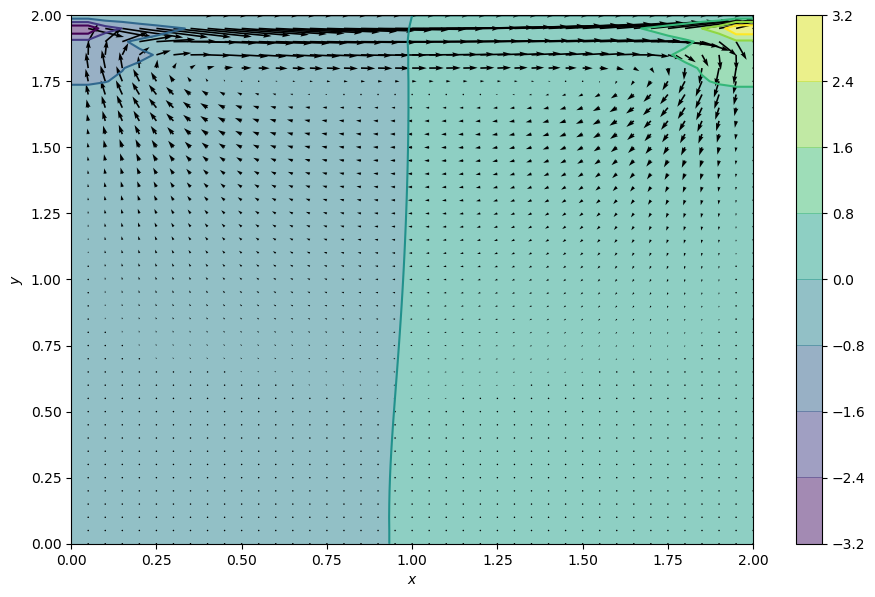

In [178]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
pyplot.contourf(X, Y, p, alpha=0.5, cmap=cm.viridis)
pyplot.colorbar()
pyplot.contour(X, Y, p, cmap=cm.viridis)
pyplot.quiver(X,Y,u,v)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')

In [180]:
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
p = np.zeros((ny,nx))
b = np.zeros((ny,nx))
nt = 1000
u, v, p = cavity_flow(nt, u, v, p, rho, nu, dt, dx, dy)

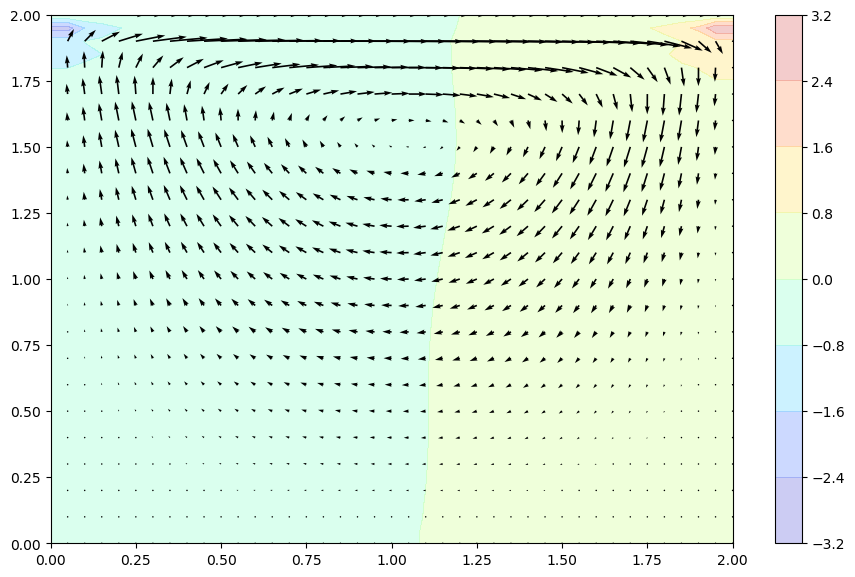

In [200]:
fig = pyplot.figure(figsize=(11,7), dpi=100)
pyplot.contourf(X, Y, p, cmap='jet', alpha=0.2)
pyplot.colorbar()
pyplot.quiver(X[::2], Y[::2], u[::2], v[::2]);